In [1]:
ours2orig = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 254, 41, 42, 43, 44, 45,
46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 85,
86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103,
104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 136, 138, 132,
133, 134, 135, 220, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 185, 186,
187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,
202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
217, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232,
233, 137, 234, 235, 236, 237, 238, 239, 240, 241, 250, 251, 255, 256, 257,
258, 259, 260, 261, 262, 263, 242, 243, 244, 245, 0, 1, 2, 3, 4, 5, 6, 7, 8,
9, 10, 11, 83, 84, 131, 139, 140, 141, 181, 182, 183, 184, 246, 247, 248,
249, 252, 253]

def vec2mat(v):
    a,b = np.triu_indices(264,1)
    m = np.zeros((264,264))
    m[a,b] = v
    return m+m.T

def remap(fc, roimap=ours2orig):
    fc = fc[roimap,:]
    fc = fc[:,roimap]
    return fc

print('Complete')

Complete


In [2]:
import pickle
import numpy as np

pncdir = '/home/anton/Documents/Tulane/Research/data-sav/anton/cohorts/PNC/'
pncdemo = pickle.load(open(f'{pncdir}/demographics.pkl', 'rb'))

rest = []
nback = []
emoid = []
restmat = []
nbackmat = []
emoidmat = []
race = []
sex = []
age = []

a,b = np.triu_indices(264,1)

for sub in pncdemo['age_at_cnb']:
    try:
        ra = pncdemo['Race'][sub]
        ag = pncdemo['age_at_cnb'][sub]
        se = pncdemo['Sex'][sub]
        if ra not in ['AA', 'EA']:
            continue
        ra = ra == 'AA'
        se = se == 'M'
        r = np.load(f'{pncdir}/fc/{sub}_task-rest_fc.npy')
        n = np.load(f'{pncdir}/fc/{sub}_task-nback_fc.npy')
        e = np.load(f'{pncdir}/fc/{sub}_task-emoid_fc.npy')
        r = remap(vec2mat(r))
        n = remap(vec2mat(n))
        e = remap(vec2mat(e))
        race.append(ra)
        sex.append(se)
        age.append(ag)
        rest.append(r[a,b])
        nback.append(n[a,b])
        emoid.append(e[a,b])
        restmat.append(r)
        nbackmat.append(n)
        emoidmat.append(e)
    except:
        pass

rest = np.stack(rest)
nback = np.stack(nback)
emoid = np.stack(emoid)
restmat = np.stack(restmat)
nbackmat = np.stack(nbackmat)
emoidmat = np.stack(emoidmat)
race = np.array(race).astype('int')
sex = np.array(sex).astype('int')
age = np.array(age)

print([a.shape for a in [rest, nback, emoid, restmat, nbackmat, emoidmat, race, sex, age]])

[(1193, 34716), (1193, 34716), (1193, 34716), (1193, 264, 264), (1193, 264, 264), (1193, 264, 264), (1193,), (1193,), (1193,)]


In [3]:
# Get summary measures

netbounds = [0, 30, 35, 49, 62, 120, 125, 156, 181, 199, 212, 221, 232, 236, 265]

def relbounds(mats, subi, r1a, r1b, r2a, r2b, sum=np.mean):
    mat = mats[subi]
    a = sum(mat[netbounds[r1a]:netbounds[r1a+1],netbounds[r1b]:netbounds[r1b+1]])
    b = sum(mat[netbounds[r2a]:netbounds[r2a+1],netbounds[r2b]:netbounds[r2b+1]])
    return a/b

def absbounds(mats, subi, r1, r2, sum=np.mean):
    mat = mats[subi]
    s = sum(mat[netbounds[r1]:netbounds[r1+1],netbounds[r2]:netbounds[r2+1]])
    return s

def varbounds(mats, subi, r1, r2, var=np.var):
    mat = mats[subi]
    v = var(mat[netbounds[r1]:netbounds[r1+1],netbounds[r2]:netbounds[r2+1]])
    return v

def varbound(mats, subi, var=np.var):
    mat = mats[subi]
    v = var(mat)
    return v

print(absbounds(restmat, 6, 4, 4))
print(varbounds(restmat, 6, 4, 4))
print(relbounds(restmat, 6, 0, 4, 4, 4))
print(varbound(restmat, 6))

0.3872079305828208
0.10987685781410861
0.8472266744903159
0.07998478487118454


In [6]:
# Get age regressor

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

agew = []
agei = []

for i in range(5):
    xtr, _, ytr, _ = train_test_split(rest, age, train_size=200)
    
    reg = Ridge(alpha=100).fit(xtr, ytr)
    w = reg.coef_
    i = reg.intercept_

    agew.append(w)
    agei.append(i)

print(agew)
print(agei)

[array([ 0.00312978,  0.00780175,  0.00678454, ...,  0.00900277,
        0.00676146, -0.00143091]), array([-0.00201838,  0.00356096,  0.00649248, ...,  0.00849157,
        0.01192134, -0.01366473]), array([-0.00350953,  0.00198403,  0.00068086, ...,  0.00831748,
        0.01363428,  0.01141828]), array([ 0.0012208 ,  0.0079525 ,  0.00627078, ..., -0.00016654,
       -0.00576979,  0.00092541]), array([ 0.00207985,  0.00050916,  0.0111157 , ...,  0.00020515,
       -0.00044829,  0.00473158])]
[12.735363753573571, 13.889868981409112, 14.289477361595678, 13.611119743382018, 14.78899136431587]


In [9]:
# Get sex regressor

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

sexw = []
sexi = []

for i in range(5):
    xtr, _, ytr, _ = train_test_split(rest, sex, stratify=sex, train_size=200)
    
    clf = LogisticRegression(C=100, max_iter=200).fit(xtr, ytr)
    w = clf.coef_[0]
    i = clf.intercept_[0]
    
    sexw.append(w)
    sexi.append(i)

print(sexw)
print(sexi)

[array([0.01623258, 0.02145839, 0.0168794 , ..., 0.04637688, 0.01581189,
       0.01643494]), array([-0.00273695, -0.02979757, -0.02482086, ...,  0.0226522 ,
        0.04189961,  0.03732831]), array([-0.00373815,  0.01874856,  0.00846789, ...,  0.0474878 ,
        0.01708958,  0.00393264]), array([-0.0035349 ,  0.00339534, -0.02612179, ..., -0.01545132,
        0.05063383,  0.00756094]), array([ 0.00307141, -0.00793858, -0.01248408, ...,  0.01345827,
        0.02506553, -0.00798478])]
[-0.006378295333465859, -0.048795858020481205, 0.034068444206484624, -0.018712846099354422, -0.023572860836530266]


In [79]:
# Get race regressor

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

racew = []
racei = []

for i in range(5):
    xtr, _, ytr, _ = train_test_split(rest, race, stratify=race, train_size=200)
    
    clf = LogisticRegression(C=0.001, max_iter=200).fit(xtr, ytr)
    w = clf.coef_[0]
    i = clf.intercept_[0]
    
    racew.append(w)
    racei.append(i)

print(racew)
print(racei)

[array([-5.67689855e-05, -4.61484284e-04, -1.43580937e-03, ...,
        3.96314013e-04,  1.02914002e-03,  7.13962874e-04]), array([ 9.52490491e-04,  6.81041080e-05,  3.02542578e-04, ...,
       -1.13718777e-03,  6.57921348e-04,  1.67406989e-03]), array([ 3.03416758e-05, -2.20946747e-04, -4.72778252e-04, ...,
        1.21443492e-04, -3.14106616e-04,  5.08491578e-04]), array([ 0.0003751 , -0.00032817, -0.00023478, ..., -0.0016246 ,
        0.00091271,  0.00114563]), array([ 0.0012987 ,  0.00108077,  0.00064665, ..., -0.00121498,
       -0.0008559 ,  0.0005397 ])]
[0.9346715049711164, 1.071117896521746, 1.4699222161461512, 1.2941424396160668, 1.0546695079113149]


In [158]:
# Get nback classifier

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

nbackw = []
nbacki = []
N = 200

for i in range(5):
    x1, _, x2, _, x3, _ = train_test_split(rest, nback, emoid, train_size=N)
    xtr = np.concatenate([x1, x2, x3])
    ytr = np.concatenate([np.zeros(N), np.ones(N), np.zeros(N)])
    
    clf = LogisticRegression(C=100, max_iter=400).fit(xtr, ytr)
    w = clf.coef_[0]
    i = clf.intercept_[0]

    nbackw.append(w)
    nbacki.append(i)

print(nbackw)
print(nbacki)

[array([ 0.02868193,  0.00149286,  0.04860058, ..., -0.03761461,
       -0.0167041 , -0.0424839 ]), array([-0.00093943,  0.00794001,  0.01703334, ..., -0.00129568,
        0.02824227,  0.00556657]), array([-0.02336084, -0.03296522,  0.01467885, ...,  0.06203698,
        0.0711149 ,  0.0252497 ]), array([ 0.01782407,  0.00362396,  0.01704445, ..., -0.01838573,
        0.01887264,  0.02129092]), array([-0.0025246 , -0.01330715, -0.03814562, ..., -0.03226475,
       -0.00924599, -0.04477008])]
[0.05682136142062845, 0.034563869792929455, 0.05405902739455983, 0.05493659027112625, 0.0072324246547568445]


In [178]:
# Get rest classifier

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

restw = []
resti = []
N = 200

for i in range(5):
    x1, _, x2, _, x3, _ = train_test_split(rest, nback, emoid, train_size=N)
    xtr = np.concatenate([x1, x2, x3])
    ytr = np.concatenate([np.ones(N), np.zeros(N), np.zeros(N)])
    
    clf = LogisticRegression(C=100, max_iter=400).fit(xtr, ytr)
    w = clf.coef_[0]
    i = clf.intercept_[0]

    if np.abs(i) > 2:
        continue

    restw.append(w)
    resti.append(i)

print(restw)
print(resti)

[array([ 0.00284601,  0.03337848,  0.01975542, ..., -0.02806069,
        0.05994757, -0.01714359]), array([ 0.0047483 ,  0.01447386, -0.01801828, ..., -0.01970162,
        0.01028177,  0.01956934]), array([ 0.02176935, -0.00253383, -0.02207834, ..., -0.01111255,
        0.00096934, -0.02287893]), array([ 0.02204425, -0.01987413, -0.02355425, ...,  0.00044988,
        0.01023269,  0.00565961]), array([ 0.03125344,  0.01161336, -0.03429643, ..., -0.04318789,
       -0.04163662, -0.02882632])]
[-0.34853621353516184, -0.023142484689553603, -0.04830417481117307, -0.2837013579982685, -0.002368016825320118]


In [180]:
# Get emoid classifier

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

emoidw = []
emoidi = []
N = 200

for i in range(5):
    x1, _, x2, _, x3, _ = train_test_split(rest, nback, emoid, train_size=N)
    xtr = np.concatenate([x1, x2, x3])
    ytr = np.concatenate([np.zeros(N), np.zeros(N), np.ones(N)])
    
    clf = LogisticRegression(C=100, max_iter=400).fit(xtr, ytr)
    w = clf.coef_[0]
    i = clf.intercept_[0]

    if np.abs(i) > 2:
        continue

    emoidw.append(w)
    emoidi.append(i)

print(nbackw)
print(nbacki)

[array([ 0.02868193,  0.00149286,  0.04860058, ..., -0.03761461,
       -0.0167041 , -0.0424839 ]), array([-0.00093943,  0.00794001,  0.01703334, ..., -0.00129568,
        0.02824227,  0.00556657]), array([-0.02336084, -0.03296522,  0.01467885, ...,  0.06203698,
        0.0711149 ,  0.0252497 ]), array([ 0.01782407,  0.00362396,  0.01704445, ..., -0.01838573,
        0.01887264,  0.02129092]), array([-0.0025246 , -0.01330715, -0.03814562, ..., -0.03226475,
       -0.00924599, -0.04477008])]
[0.05682136142062845, 0.034563869792929455, 0.05405902739455983, 0.05493659027112625, 0.0072324246547568445]


In [534]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import itertools
import random

def rmse(a, b, mean=torch.mean):
    return mean((a-b)**2)**0.5

class FC(nn.Module):
    def __init__(self, n, reg_w, reg_i, reg_tgt, clf_w, clf_i, clf_tgt):
        super(FC, self).__init__()
        self.x = nn.Parameter(0.1*torch.randn(n,264,5).float().cuda())
        self.reg_w = [torch.from_numpy(w).float().cuda() for w in reg_w]
        self.reg_i = reg_i
        self.reg_tgt = reg_tgt
        self.clf_w = [torch.from_numpy(w).float().cuda() for w in clf_w]
        self.clf_i = clf_i
        self.clf_tgt = clf_tgt

    def getfc(self):
        x = torch.einsum('nai,nbi->nab', self.x, self.x)
        return x

    def getvecfc(self, x):
        a,b = torch.triu_indices(264,264,offset=1)
        return x[:,a,b]

    def getfcnp(self):
        with torch.no_grad():
            x = self.getfc()
        x = x.detach().cpu().numpy()
        m = np.max(np.abs(x))
        if m > 1:
            return x/m
        return x

    def forward(self, vfc, ab, ab_tgts, vb, vb_tgts):
        x = self.getfc()
        x[torch.isnan(x)] = 0.01
        y = self.getvecfc(x)
        loss = 0
        loss += torch.mean(torch.exp(torch.abs(x)**5))
        for w,i,tgt in zip(self.reg_w, self.reg_i, self.reg_tgt):
            loss += 2*rmse(tgt, y@w+i)
        for w,i,tgt in zip(self.clf_w, self.clf_i, self.clf_tgt):
            loss += 2*torch.mean(torch.exp((1-2*tgt)*(y@w+i)))
        for i in range(len(x)):
            v = varbound(x, i, var=torch.var)
            loss += rmse(vfc, v)
        for i in range(len(x)):
            for b, tgt in zip(ab, ab_tgts):
                r1, r2 = b
                v = absbounds(x, i, r1, r2, sum=torch.mean)
                loss += rmse(v, tgt)
        for i in range(len(x)):
            for b, tgt in zip(vb, vb_tgts):
                r1, r2 = b
                v = varbounds(x, i, r1, r2, var=torch.var)
                loss += rmse(v, tgt)
        return loss

fakemats = []

for subi in range(200):
    nreg = 3
    
    fc = FC(5, agew[:nreg], agei[:nreg], nreg*[age[subi]], 
            sexw[:nreg] + racew[:nreg] + restw[:nreg] + nbackw[:nreg] + emoidw[:nreg], 
            sexi[:nreg] + racei[:nreg] + resti[:nreg] + nbacki[:nreg] + emoidi[:nreg], 
            nreg*[sex[subi]] + nreg*[race[subi]] + nreg*[1] + nreg*[0] + nreg*[0])
    optim = torch.optim.Adam(fc.parameters(), lr=5e-3)
    
    nepochs = 300
    pperiod = 50
    
    mat = restmat
    ab = []
    for i in range(14):
        ab.append((i,i))
    for _ in range(14):
        ab.append((random.randint(0,13),random.randint(0,13)))
    ab.append((0,1))
    
    ab_tgts = [absbounds(mat, subi, r1, r2) for r1, r2 in ab]
    vb = ab
    vb_tgts = [varbounds(mat, subi, r1, r2) for r1, r2 in ab]
    vfc = varbound(mat, subi)
    
    for e in range(nepochs):
        optim.zero_grad()
        loss = fc(vfc, ab, ab_tgts, vb, vb_tgts)
        loss.backward()
        optim.step()
        if e % pperiod == 0 or e == nepochs-1:
            print(f'{e} {loss}')

    print(f'Done {subi}')

    a,b = np.triu_indices(264,1)
    x = fc.getfcnp()
    for i in range(len(x)):
        if np.sum(np.isnan(x[i])) > 0:
            continue
        fakemats.append(x[i][a,b])

    print(len(fakemats))

0 74.73545837402344
50 30.11941909790039
100 10.024626731872559
150 5.342562675476074
200 3.6413567066192627
250 2.875443935394287
299 18.778005599975586
Done 0
4
0 120.25516510009766
50 50.235633850097656
100 13.09072208404541
150 4.82472562789917
200 2.9073023796081543
250 2.2383041381835938
299 2.2369251251220703
Done 1
9
0 87.22105407714844
50 31.57883644104004
100 9.675703048706055
150 4.561192035675049
200 2.9299230575561523
250 2.5811026096343994
299 2.490028142929077
Done 2
14
0 132.85305786132812
50 62.710025787353516
100 17.371013641357422
150 8.835271835327148
200 4.982980728149414
250 3.2126784324645996
299 2.4475467205047607
Done 3
19
0 119.99226379394531
50 61.806129455566406
100 19.920434951782227
150 7.703548431396484
200 5.0138258934021
250 3.484816789627075
299 3.039165496826172
Done 4
24
0 105.91027069091797
50 31.753984451293945
100 10.30029010772705
150 6.102380752563477
200 4.2266316413879395
250 3.0625598430633545
299 2.612208366394043
Done 5
29
0 149.43606567382

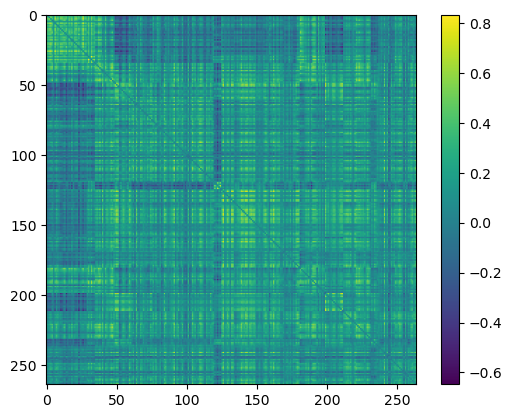

In [545]:
import matplotlib.pyplot as plt

one_minus_eye = np.ones((264,264))-np.eye(264)

# plt.imshow(fc.getfcnp()[2]*one_minus_eye)
# plt.imshow(restmat[0])
plt.imshow(vec2mat(fakemats[319]))
plt.colorbar()
plt.show()

In [548]:
import pickle

f = open('/home/anton/Documents/Tulane/Research/Work/Imputation/fake_rest200_5.pkl', 'wb')

pickle.dump(fakemats, f)

print('Done')

Done
